In [1]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch
from datasets import load_dataset
import pandas as pd
import numpy as np
from src.tfr_decoding.finepref_sample import sample # new sampling method
from src.utils.samp_utils import inpsampall, dset_randsamp   
from src.tfr_decoding.shp_modeling import T5BinaryClassifier
from prefix_sampling import PrefixSampler, test_baseline, test_pfsample, test_finesample, test_apsample, test_enhancedsample
import matplotlib.pyplot as plt
from ast import literal_eval
import re

In [45]:
ehnew = pd.read_csv("/home/prasann/Projects/tfr-decoding//output/hparam_explore5/enhsamp5_14_25_35vpt7.csv", index_col=False)

In [46]:
ehnew.scos.mean()

0.8453238318430497

In [47]:
len(ehnew)

149

In [48]:
ehnew['sampnum'] = [len(literal_eval(a)) for a in ehnew['allscos']]

In [40]:
pfs.iloc[:300][ehnew.sampnum>1].scos.mean()

0.8112936641065422

In [53]:
ehnew[ehnew.sampnum==1].scos.mean()

0.8852345901727676

In [22]:
eh1 = pd.read_csv("/home/prasann/Projects/tfr-decoding//output/hparam_explore4/enhsamp5_20_30v2.csv", index_col=False)

In [116]:
ehp7 = pd.read_csv("/home/prasann/Projects/tfr-decoding//output/hparam_explore4/enhsamp5_20_30vpt7.csv", index_col=False)

In [122]:
ehp7.budgets.mean()

137.1505016722408

In [11]:
b4.iloc[:100].scos.mean()

0.852865713234

(array([  4.,   9.,  49., 169., 201., 108.,  35.,  17.,   5.,   3.]),
 array([-0.32428956, -0.24524087, -0.16619217, -0.08714348, -0.00809479,
         0.07095391,  0.1500026 ,  0.22905129,  0.30809999,  0.38714868,
         0.46619737]),
 <BarContainer object of 10 artists>)

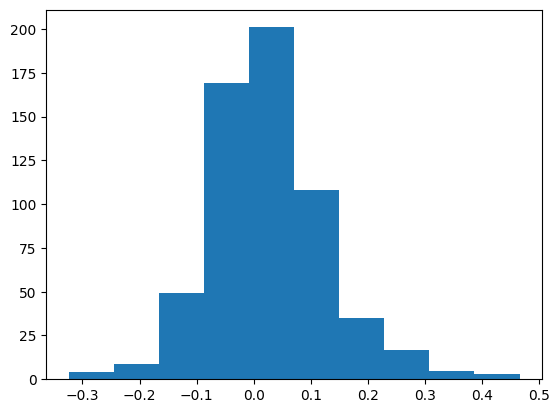

In [124]:
plt.hist(list(b4.scos-eh1.scos))

In [29]:
eh1.iloc[:49].budgets.mean()

115.63265306122449

In [23]:
len(ehp7)

49

In [17]:
eh1 = pd.read_csv("/home/prasann/Projects/tfr-decoding//output/hparam_explore3/enhsamp10_20_30.csv", index_col=False)

In [29]:
eh2 = pd.read_json("/home/prasann/Projects/tfr-decoding//output/hparam_explore2/enhsamp7_20.jsonl", orient="records", lines=True)

In [11]:
eh1['scos'].mean()

0.8313244177897772

In [13]:
eh1['budgets'].mean()

134.69333333333333

In [61]:
eh1['nsamp'] = [len(literal_eval(a)) for a in eh1['allscos']]

In [20]:
eh1[eh1.samps==1].scos.mean()

0.8702718861870937

In [22]:
len(eh1[eh1.samps==1])

444

In [33]:
b4.iloc[:300][ehnew.nsamp==1].budgets.mean()

AttributeError: 'DataFrame' object has no attribute 'nsamp'

In [59]:
olens = [len(s.split(" ")) for s in eh1.outs]
eh1['olens'] = olens

In [96]:
with open('hypexp3cp.txt', 'r') as file:
    data = file.read()

In [97]:
#data = data.replace("0.85", "")
#data = data.replace("0.75", "")
#data = data.replace("0.8", "")
#data = data.replace("0.7", "")
data = data.replace("[]", "")

In [98]:
out_inps = data.split("start decoding")

In [108]:
def get_depth(s):
    vals = [float(f) for f in re.findall("\d+\.\d+", s)][2:-2]
    d = 0
    blind = -1
    blcnt = 0
    for v in vals:
        if v>0.7:
            d = d+1
            blcnt = 0
        else:
            blcnt = blcnt +1
        if blcnt==12:
            blind = d
    return d, blind, len(vals)

def checkmax(s):
    vals = [float(f) for f in re.findall("\d+\.\d+", s)][2:-2]
    print(max(vals))
    if max(vals)<0.9:
        return 1
    return 0

In [100]:
setv = out_inps[1:601]

In [101]:
setv[11]

'\n0.7\n0.8\nWhile\ncheckpoint prob is  0.787611186504364\nWhile licking your\nWhile licking your lips will\nWhile licking your lips will hydrate them temporarily\nWhile licking your lips will hydrate them temporarily, if\nWhile licking your lips will hydrate them temporarily, if you do it\ncheckpoint prob is  0.9850274920463562\nWhile licking your lips will hydrate them temporarily, if you do it too often your\nWhile licking your lips will hydrate them temporarily, if you do it too often your lips will become\nWhile licking your lips will hydrate them temporarily, if you do it too often your lips will become dry. The\nWhile licking your lips will hydrate them temporarily, if you do it too often your lips will become dry. The key is to\ncheckpoint prob is  0.9970123767852783\nadaptive, score  tensor([0.8971])   While licking your lips will hydrate them temporarily, if you do it too often your lips will become dry. The key is to lick them when they are dry, not while they are wet.\n45\n

In [ ]:
sum([checkmax(m) for m in setv])

In [105]:
depdata = [get_depth(sv) for sv in setv]

In [106]:
eh1['depth'], eh1['maxind'], eh1['samps'] = [d[0] for d in depdata], [d[1] for d in depdata], [d[2] for d in depdata]

In [107]:
eh1[eh1.nsamp>]

0      2
1      0
2      0
3      3
4      0
      ..
595    3
596    1
597    3
598    3
599    0
Name: depth, Length: 600, dtype: int64

In [115]:
tmp = eh1[eh1.nsamp>1]
tmp[tmp.depth==0].scos.mean()

0.6510771387729092

In [63]:
eh1[eh1.nsamp>1]['']

,Unnamed: 0,scos,budgets,outs,allscos,allstrs,depth,maxind,samps,olens,nsamp
1,1,0.703003,105,"The problem with Eventually, the pressure woul...","[0.6976476907730103, 0.7030027508735657]",['The problem with making a submarine too thic...,1,1,15,24,2
4,4,0.844910,278,There is no simple is the simplest. Its the ea...,"[0.6613632440567017, 0.8449100255966187]",['Some examples of programming languages are B...,1,1,15,139,2
5,5,0.591316,115,All files on your harddrive have file names an...,"[0.5913158655166626, 0.40268614888191223]",['All files on your harddrive have file names ...,1,1,15,32,2
7,7,0.632880,127,"The answer is through a combination of an ""alg...","[0.6328802108764648, 0.5963546633720398]","['The answer is through a combination of an ""a...",1,1,15,18,2
16,16,0.583863,112,"That is, they don't know how to crack it, and ...","[0.5838630199432373, 0.5266185402870178]","[""That is, they don't know how to crack it, an...",1,1,15,18,2
...,...,...,...,...,...,...,...,...,...,...,...
583,583,0.779348,150,"The answer is the same, drink it or eat it, th...","[0.7793480157852173, 0.5479886531829834]","['The answer is the same, drink it or eat it, ...",2,1,15,52,2
585,585,0.767721,183,Unix-like operating systems such as Linux have...,"[0.767720639705658, 0.5165828466415405]",['Unix-like operating systems such as Linux ha...,2,1,15,50,2
589,589,0.739054,96,"When you tilt the pitcher of beer, the beer fl...","[0.7390542030334473, 0.6114546656608582]","['When you tilt the pitcher of beer, the beer ...",2,1,15,24,2
596,596,0.776336,103,Shaking up a soda causes the pressure within i...,"[0.7763361930847168, 0.4832739233970642]",['Shaking up a soda causes the pressure within...,2,1,15,24,2


In [39]:
eh1.loc[599]

Unnamed: 0                                                  599
scos                                                   0.524582
budgets                                                     113
outs          Diesel engines operate at the top of the cylin...
allscos                [0.4631933867931366, 0.5245818495750427]
allstrs       ['The first four rows are the cylinders, the l...
Name: 599, dtype: object

In [8]:
eh1['olens'] = olens

In [32]:
eh1[eh1.samps==1].olens.mean()

64.79054054054055

In [24]:
b4 = pd.read_json("/home/prasann/Projects/tfr-decoding//output/hparam_explore1/base4.jsonl", orient="records", lines=True)

In [29]:
pfs = pd.read_json("/home/prasann/Projects/tfr-decoding//output/hparam_explore1/pfsamp_10_20_30.jsonl", orient="records", lines=True)

In [33]:
eh1[eh1.samps>1].olens.mean()

40.3525641025641

In [ ]:
eh2 = pd.read_json("/home/prasann/Projects/tfr-decoding//output/hparam_explore2/enhsamp7_20_30.jsonl", orient="records", lines=True)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# first load relevant models
device = 'cuda:0' # if you have a GPU
# pfmod_path = "./lightning_logs/bestmodel/checkpoints/epoch=2-step=23950.ckpt"
pfmod_path = "./lightning_logs/bestmodel2/checkpoints/epoch=2-step=36436.ckpt"
# get generation model
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-xxl")

In [ ]:
qpref = T5BinaryClassifier.load_from_checkpoint(pfmod_path)
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-xxl", device_map="auto")#.to(device)
#model.sample = sample.__get__(model)
model.tokenizer = tokenizer
model.tok = tokenizer
pfname = 'stanfordnlp/SteamSHP-flan-t5-large'
max_len = 512
learning_rate = 3e-5
preftok = T5Tokenizer.from_pretrained(pfname)

model.qualitypref = qpref
#model.stdpref = T5BinaryClassifier.load_from_checkpoint("./lightning_logs/version_11/checkpoints/epoch=3-step=3359.ckpt")
# set up relevant mdoels
model.downmetric = T5ForConditionalGeneration.from_pretrained('stanfordnlp/SteamSHP-flan-t5-xl').to(device)
model.downtok = T5Tokenizer.from_pretrained('stanfordnlp/SteamSHP-flan-t5-xl')
model.eval()

In [6]:
# load up our dataset
elidf = pd.read_json("output/elidataset.jsonl", orient="records", lines="true")
# start from 15000 for latest exploration
elidf = elidf.drop_duplicates(subset="history").iloc[15000:15100]

pfsampler = PrefixSampler(model)
inplist = list(elidf['history'])

In [15]:
fname = None
finesample_df = test_enhancedsample(inplist[2:3], pfsampler, 18, [5, 20], 3, 1, .5, .8, 2, fname)
        

start decoding
0.5
0.8
This depends
checkpoint prob is  0.01276630163192749
[]
The mass
checkpoint prob is  0.09227520227432251
[]
ISON
checkpoint prob is  0.9470208287239075
ISON, and other
ISON, and other Sun-gra
ISON, and other Sun-grazing comet
ISON, and other Sun-grazing comets, will
ISON, and other Sun-grazing comets, will undergo a
checkpoint prob is  0.7743089199066162
adaptive, score  tensor([0.9424])   ISON, and other Sun-grazing comets, will undergo a process called fragmentation as they approach the Sun. The amount of mass lost is measured by the fraction of the comet that breaks up and enters the inner solar system. Because they've known for decades that this is a possible process, astronomers can predict the Sun's gravitational pull on the comet by knowing this fraction. So, yes, changing the mass of the comet will affect its path. However, the fraction of the comet that reaches the inner solar system is too small to affect the comet's course.
141
0.9424046874046326


In [ ]:
with torch.no_grad():
    finesample_df = test_finesample(inplist, pfsampler, 9, 3, 6, 5)
    finesample_df.to_json("output/hparam_explore/fsamp.jsonl", orient="records", lines=True)

In [ ]:
with torch.no_grad():
    finesample_df = test_apsample(inplist[:10], pfsampler, 0.85, 3, 1, 3)


In [ ]:
with torch.no_grad():
    finesample_df = test_pfsample(inplist[:10], pfsampler, 0.85, 3, 1, 3)

In [12]:
ind = 1
with torch.no_grad():
    finesample_df = test_enhancedsample(inplist[ind:ind+1], pfsampler, 18, [7, 20], 3, 3, None)

start decoding
The only
The only thing stopping submarine
checkpoint prob is  0.19921958446502686
[]
Pressure on
Pressure on submarines is
checkpoint prob is  0.005880117416381836
[]
In order
In order to have the
checkpoint prob is  0.03429371118545532
[]
It would
It would not work as
checkpoint prob is  0.02583026885986328
[]
The problem
The problem is that sub
checkpoint prob is  0.6035387516021729
[]
The pressure
The pressure of the sea
checkpoint prob is  0.007084548473358154
[]
The pressure
The pressure at the top
checkpoint prob is  0.011049389839172363
[]
You can
You cant make
checkpoint prob is  0.05515897274017334
[]
adaptive, score  tensor([0.8301])   <pad> The problem is that subs need to be able to fit through tiny spaces at deep depths, and the thicker your sub, the bigger the space, and the smaller the submarine will be able to go. That said, a ten-foot thick sub would have a size limit of about 5,000 feet deep.</s>
adaptive, score  tensor([0.6299])   <pad> The only thing

/home/prasann/miniconda3/envs/rewardenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:43: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = getattr(asarray(obj), method)(*args, **kwds)
/home/prasann/miniconda3/envs/rewardenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(o

In [13]:
finesample_df

,scos,budgets,outs,allscos,allstrs
0,0.832388,164,The problem is that subs need to be able to fi...,"[[tensor(0.8301)], [tensor(0.6299)], [tensor(0...",[<pad> The problem is that subs need to be abl...


In [69]:
a = [1, 2]
a[:-3]

[]

In [36]:
resold = pd.read_json("output/hparam_explore2/enhsamp7_20.jsonl", orient='records', lines=True)

In [32]:
resold = pd.read_csv("output/hparam_explore3/enhsamp10_20_30.csv", index_col=False)

In [37]:
print(mean(resold.scos))
print(mean(resold.budgets))

0.8172568081813334
135.60666666666665


In [24]:
resold

,Unnamed: 0,scos,budgets,outs,allscos,allstrs
0,0,0.892315,24,Syria isn't a country. It's a country and it h...,[tensor([0.8578])],"[""<pad> Syria isn't a country. It's a country ..."
1,1,0.882216,99,You are trying to solve a problem that's how t...,"[tensor([0.7405]), tensor([0.8828])]",['<pad> Although thicker subs might be able to...
2,2,0.804521,98,"If you look at the trajectory of Comet ISON, i...",[tensor([0.7971])],"[""<pad> If you look at the trajectory of Comet..."
3,3,0.874454,69,"These are blisters, most commonly caused by fr...",[tensor([0.8676])],"[""<pad> These are blisters, most commonly caus..."
4,4,0.845007,162,I think you're being overly complicated about ...,[tensor([0.8231])],"[""<pad> I think you're being overly complicate..."
...,...,...,...,...,...,...
595,595,0.923366,24,The freezing response is your body's normal re...,[tensor([0.9053])],"[""<pad> The freezing response is your body's n..."
596,596,0.664646,127,"This is due to surface tension, which causes s...","[tensor([0.5764]), tensor([0.4258]), tensor([0...","['<pad> This is due to surface tension, which ..."
597,597,0.940828,223,"Cultural appropriation is defined as ""an appro...",[tensor([0.9167])],"['<pad> Cultural appropriation is defined as ""..."
598,598,0.965611,237,There are two things that help a human fetus a...,[tensor([0.9471])],"[""<pad> There are two things that help a human..."


(array([  2.,   5.,   9.,  15.,  23.,  60.,  94., 155., 162.,  75.]),
 array([0.42060399, 0.47777033, 0.53493668, 0.59210302, 0.64926937,
        0.70643571, 0.76360205, 0.8207684 , 0.87793474, 0.93510109,
        0.99226743]),
 <BarContainer object of 10 artists>)

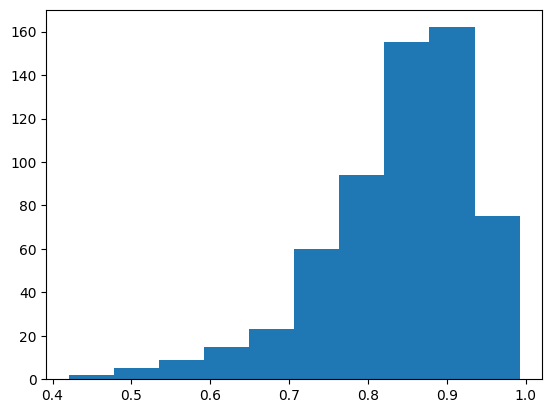

In [14]:
plt.hist(resold.scos)

In [16]:
from statistics import median, mean

In [39]:
mean(resold['extra_toks'])

56.7

In [38]:
def count_tokens(text):
    return len(tokenizer(text).input_ids)

resold['extra_toks'] = resold['budgets'] - resold['outs'].apply(count_tokens)

(array([155.,  65.,  53.,  38.,  17.,  23.,  13.,  11.,  14.,  11.]),
 array([ -1. ,   9.8,  20.6,  31.4,  42.2,  53. ,  63.8,  74.6,  85.4,
         96.2, 107. ]),
 <BarContainer object of 10 artists>)

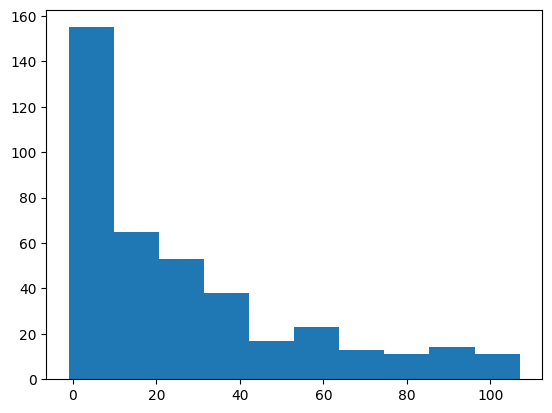

In [75]:
plt.hist(resold[resold.extra_toks<108].extra_toks)

In [53]:
len(resold[resold.extra_toks<108].scos)

400

In [40]:
mean(resold.extra_toks)

56.7

In [ ]:
list(resold.extra_toks)

0.8611249660569975


(array([  2.,   2.,   3.,   4.,  16.,  34.,  67., 114.,  99.,  52.]),
 array([0.47133097, 0.52397953, 0.57662809, 0.62927665, 0.68192521,
        0.73457377, 0.78722233, 0.83987089, 0.89251944, 0.945168  ,
        0.99781656]),
 <BarContainer object of 10 artists>)

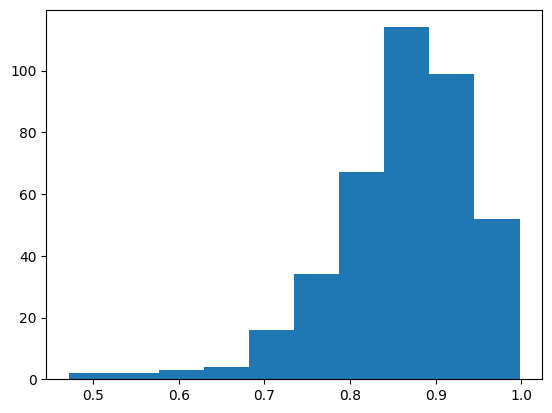

In [41]:
sub = resold[resold.extra_toks<100].scos
print(mean(sub))
plt.hist(sub)

(array([220.,  91.,  40.,  25., 170.,  16.,  26.,   5.,   4.,   3.]),
 array([ -1. ,  21.1,  43.2,  65.3,  87.4, 109.5, 131.6, 153.7, 175.8,
        197.9, 220. ]),
 <BarContainer object of 10 artists>)

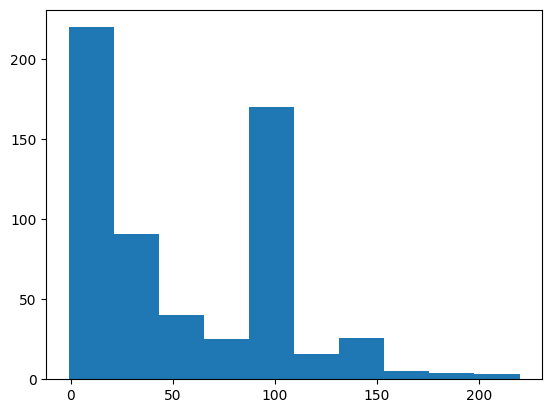

In [42]:
plt.hist(resold.extra_toks)

In [23]:
finesample_df

,scos,budgets,outs
0,0.654249,68,I think that is important to understand the si...
1,0.857752,41,The pressure is not the only issue. The heat g...
2,0.876001,126,The best we can tell is that ISON will lose ab...
3,0.879815,49,Blisters are a sign that your skin has broken ...
4,0.909598,306,"Many people are good at explaining things, but..."
5,0.556138,130,An uninstaller is a program that helps with th...
6,0.909758,67,I was just trying to figure out who in their r...
7,0.859151,161,"To find and index websites, a search engine us..."
8,0.572144,269,The only explanation I can come up with is tha...
9,0.792256,39,Another article on the subject; _URL_1_. The '...


In [9]:
a = [1, 2]

In [20]:
finesample_df['budgets'].mean()

137.4

In [3]:
a1 = pd.read_json("output/pfsample/finesamp.jsonl", orient="records", lines=True)


In [5]:
a1.budgets.mean()

115.71

In [ ]:
adaptbase_df = test_baseline(inplist, pfsampler, .85, 4)
pfsample_df = test_pfsample(inplist, pfsampler, 18, [10, 20])

adaptbase_df.to_json("output/pfsample/abase.jsonl", lines=True, orient='records')
pfsample_df.to_json("output/pfsample/pfsample.jsonl", lines=True, orient='records')

monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp


In [8]:
print(adaptbase_df['budgets'].mean())
print(adaptbase_df['scos'].mean())

130.4
0.809410572052002


In [12]:
print(pfsample_df['budgets'].mean())
print(pfsample_df['scos'].mean())

253.6
0.8504377722740173


In [26]:
adaptbase_df = test_baseline(inplist, pfsampler, .85, 2)

monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp
monkeysamp


In [27]:
print(adaptbase_df['budgets'].mean())
print(adaptbase_df['scos'].mean())

129.2
0.8531928896903992
